In [59]:
import nilearn
import numpy as np
import pandas as pd
from nilearn import plotting
from nilearn import image
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, view_img
from nilearn.glm.first_level import FirstLevelModel
from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import plot_contrast_matrix
import matplotlib.pyplot as plt
from nilearn.glm import threshold_stats_img
from numpy import array

# General Code for a Single Run

In [60]:
view_file = "/Users/bradpowell/Desktop/sub-01/Events/view_1.tsv"
events_view = pd.read_csv(view_file, sep='\t')

In [61]:
events_view['trial_type'] = 'view'

In [62]:
recall_file = "/Users/bradpowell/Desktop/sub-01/Events/recall_1.tsv"
events_recall = pd.read_csv(recall_file, sep='\t')

In [63]:
events_recall['trial_type'] = 'recall'

In [64]:
events = pd.concat([events_view, events_recall])

In [65]:
events

,onset,duration,trial_type
0,5,441,view
1,468,411,view
2,901,329,view
0,4,255,recall
1,259,251,recall
2,510,252,recall


In [66]:
confounds_file = "/Users/bradpowell/Desktop/sub-01/Functional/confounds_1.txt"
confounds = pd.read_csv(confounds_file, sep='\t')

In [67]:
confounds

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05
0,0.002519,0.034484,0.042679,-0.000359,-0.000000,-0.000139,0.184626,-0.022284,0.033514,-0.003216,0.022537,-0.032533,0.047717
1,0.003481,-0.002960,0.012715,-0.000131,0.000179,-0.000213,0.092373,-0.008061,0.045153,0.005634,0.008764,-0.012524,0.030110
2,0.012793,-0.038440,0.009092,0.000264,-0.000000,0.000000,0.087703,0.007425,0.041236,0.006669,0.010797,-0.031716,-0.004556
3,0.011578,0.048193,0.034242,-0.000186,-0.000350,0.000000,0.152991,0.024364,0.032227,0.007002,0.023704,-0.022913,0.035918
4,0.018857,-0.064000,0.011894,0.000035,-0.000200,0.000164,0.168560,0.046522,-0.015562,-0.020857,0.034018,-0.029913,-0.047896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,-0.275143,0.348608,0.624698,0.005132,0.009753,-0.003061,0.131080,-0.006748,-0.038223,-0.001239,0.022087,0.000746,0.006899
1238,-0.267081,0.364445,0.621187,0.004828,0.009425,-0.002931,0.065548,-0.030968,0.009949,0.003532,0.027907,-0.013297,0.033900
1239,-0.256902,0.285516,0.607489,0.005574,0.009429,-0.002886,0.142578,0.012471,0.031393,-0.010946,0.017551,-0.028775,-0.025791
1240,-0.274648,0.357468,0.630397,0.005530,0.009201,-0.002809,0.130067,0.029363,-0.013724,0.011009,0.048897,-0.019884,0.015826


In [68]:
timings = np.arange(0, len(confounds))
design_matrix_constant = make_first_level_design_matrix(timings, events, drift_model=None)

In [69]:
design_matrix = pd.concat([design_matrix_constant, confounds], axis=1)

In [70]:
design_matrix

,recall,view,constant,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05
0,0.0,0.000000,1.0,0.002519,0.034484,0.042679,-0.000359,-0.000000,-0.000139,0.184626,-0.022284,0.033514,-0.003216,0.022537,-0.032533,0.047717
1,0.0,0.000000,1.0,0.003481,-0.002960,0.012715,-0.000131,0.000179,-0.000213,0.092373,-0.008061,0.045153,0.005634,0.008764,-0.012524,0.030110
2,0.0,0.000000,1.0,0.012793,-0.038440,0.009092,0.000264,-0.000000,0.000000,0.087703,0.007425,0.041236,0.006669,0.010797,-0.031716,-0.004556
3,0.0,0.000000,1.0,0.011578,0.048193,0.034242,-0.000186,-0.000350,0.000000,0.152991,0.024364,0.032227,0.007002,0.023704,-0.022913,0.035918
4,0.0,0.000000,1.0,0.018857,-0.064000,0.011894,0.000035,-0.000200,0.000164,0.168560,0.046522,-0.015562,-0.020857,0.034018,-0.029913,-0.047896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,0.0,-0.058823,1.0,-0.275143,0.348608,0.624698,0.005132,0.009753,-0.003061,0.131080,-0.006748,-0.038223,-0.001239,0.022087,0.000746,0.006899
1238,0.0,-0.204602,1.0,-0.267081,0.364445,0.621187,0.004828,0.009425,-0.002931,0.065548,-0.030968,0.009949,0.003532,0.027907,-0.013297,0.033900
1239,0.0,-0.277237,1.0,-0.256902,0.285516,0.607489,0.005574,0.009429,-0.002886,0.142578,0.012471,0.031393,-0.010946,0.017551,-0.028775,-0.025791
1240,0.0,-0.291891,1.0,-0.274648,0.357468,0.630397,0.005530,0.009201,-0.002809,0.130067,0.029363,-0.013724,0.011009,0.048897,-0.019884,0.015826


In [71]:
view_array = np.zeros(len(design_matrix.columns))
view_array[1] = 1
view_array

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [72]:
recall_array = np.zeros(len(design_matrix.columns))
recall_array[0] = 1
recall_array

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
conditions = {
    'view': view_array,
    'recall': recall_array,
}

In [74]:
view_minus_recall = conditions['view'] - conditions['recall']

<AxesSubplot:label='conditions'>

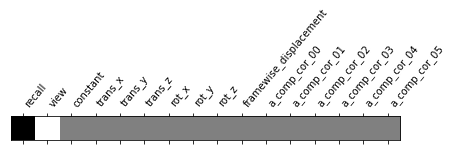

In [75]:
plot_contrast_matrix(view_minus_recall, design_matrix=design_matrix)

In [76]:
image_file = "/Users/bradpowell/Desktop/sub-01/Functional/run_1.nii.gz"
fmri_imgs = image.load_img(image_file)
avg_img = mean_img(fmri_imgs)

In [77]:
fmri_glm = FirstLevelModel(t_r=1,
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model=None,
                           high_pass=.01)

In [78]:
fmri_glm = fmri_glm.fit(fmri_imgs, design_matrices = design_matrix)

In [79]:
z_map = fmri_glm.compute_contrast(view_minus_recall,
                                  output_type='z_score')

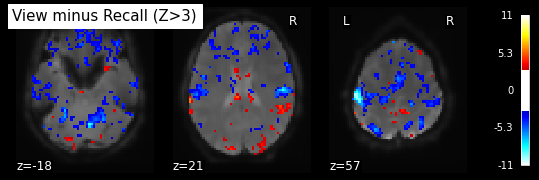

In [80]:
plot_stat_map(z_map, bg_img=avg_img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='View minus Recall (Z>3)')
plt.show()

Uncorrected p<0.001 threshold: 3.291


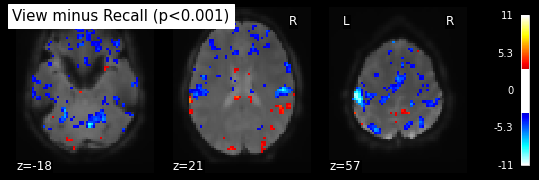

In [81]:
_, threshold = threshold_stats_img(z_map, alpha=.001, height_control='fpr')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=avg_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='View minus Recall (p<0.001)')
plt.show()

Bonferroni-corrected, p<0.05 threshold: 4.958


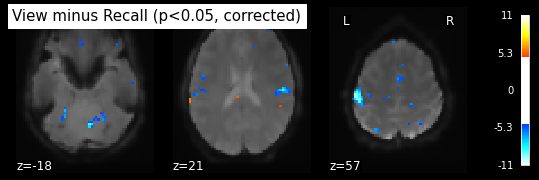

In [82]:
_, threshold = threshold_stats_img(
    z_map, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=avg_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='View minus Recall (p<0.05, corrected)')
plt.show()

False Discovery rate = 0.05 threshold: 2.567


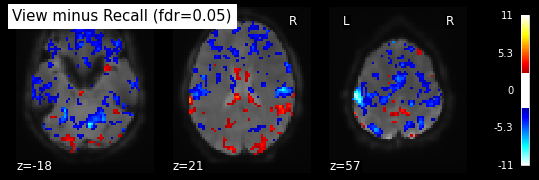

In [83]:
_, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
print('False Discovery rate = 0.05 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=avg_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='View minus Recall (fdr=0.05)')
plt.show()

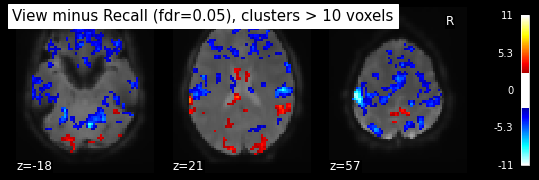

In [84]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.05, height_control='fdr', cluster_threshold=10)
plot_stat_map(clean_map, bg_img=avg_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='View minus Recall (fdr=0.05), clusters > 10 voxels')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



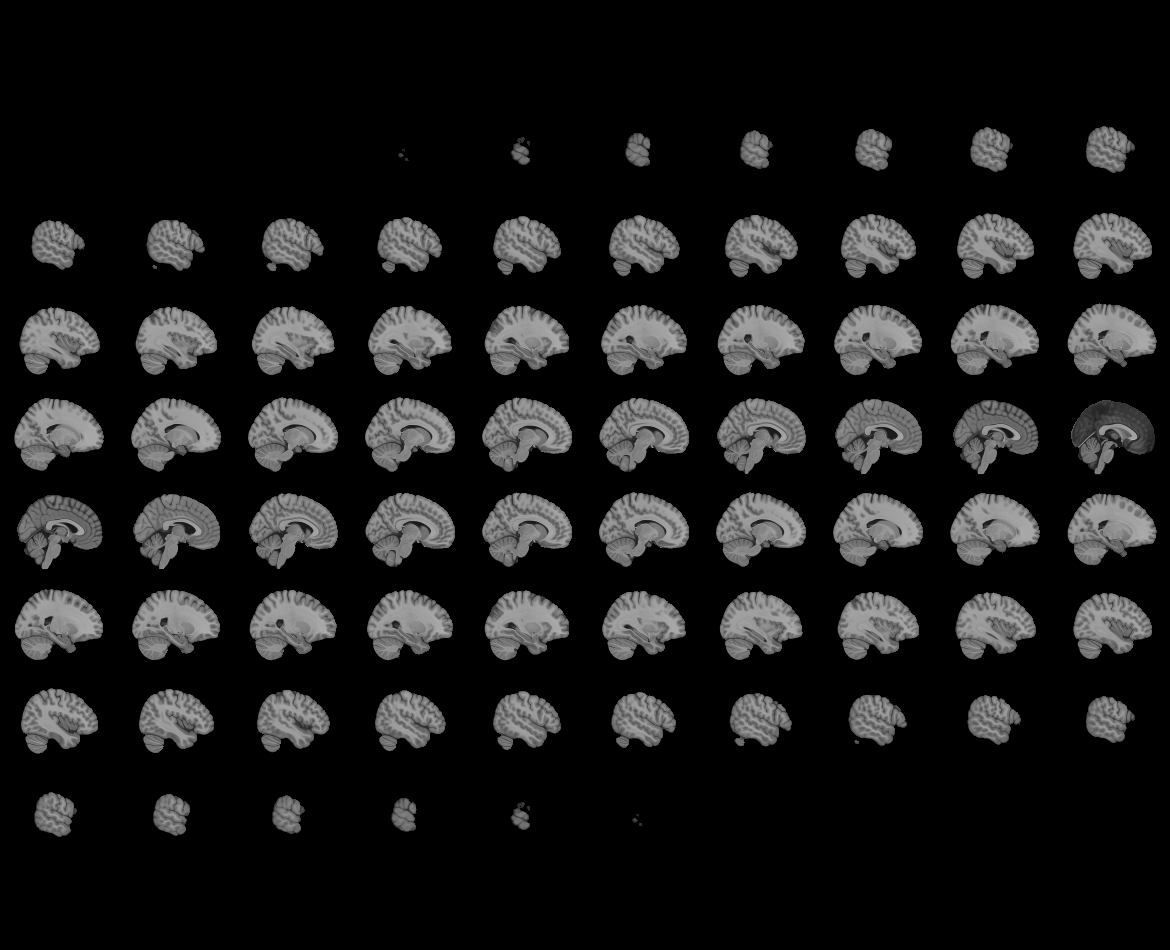
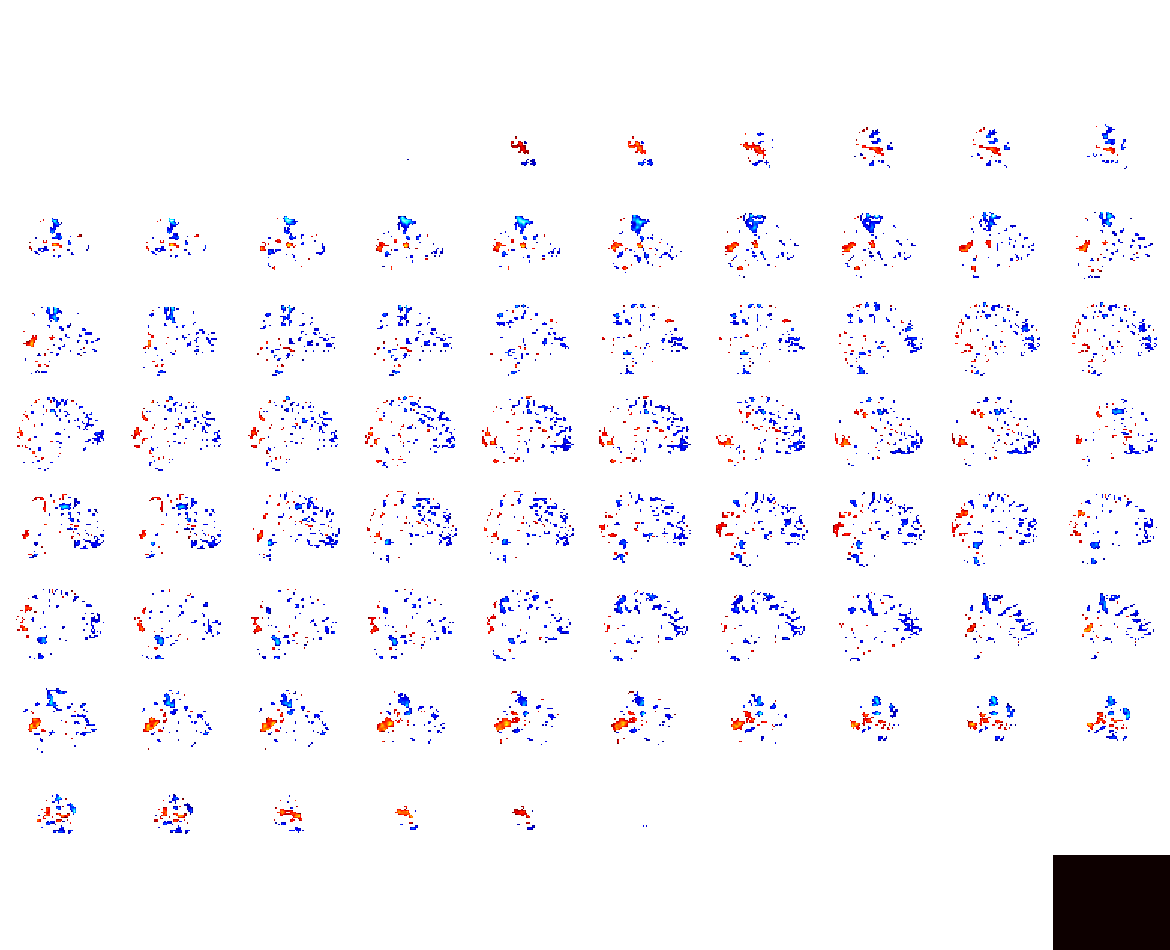

In [85]:
view_img(z_map, threshold = 3.0)